In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline


# Информация о данных

Датасет содержит информацию об ожидаемой продолжительности жизни и факторах здоровья населения 193-х стран за 2000-2015 годы. Набор данных содержит около 22 признаков, которые можно разделить на категории: факторы, связанные с иммунизацией, факторы смертности, экономические факторы и социальные факторы. Все представленные страны можно разделить на 2 класса: хорошо развитые страны и еще только развивающиеся.

# Загрузка данных

In [2]:
url = "https://raw.githubusercontent.com/lutovatanya/machine-learning-course-2022/main/Life_Expectancy_Dataset.csv"
data_raw = pd.read_csv(url, sep=',', engine='python')
data_raw.shape

(2938, 22)

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует информации об одном человеке) и количество столбцов (каждый столбец соответствует конкретному признаку). Как видно из вывода, набор данных содержит 2938 строк и 22 столбца

In [3]:
data_raw.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Всего в датасете содержится 22 признака

#### Признаки:

1. Country - страна 
2. Year - год
3. Status - статус
4. Life expectancy - ожидаемая продолжительность жизни
5. Adult Mortality - показатели смертности среди взрослых (от 15 до 60 лет)
6. infant deaths - кол-во младенческих смертей
7. Alcohol - учет потребления алкоголя на душу населения
8. percentage expenditure - расходы на здравоохранение в % от ВВП на душу населения
9. Hepatitis B - охват иммунизацией против гепатита B среди годовалых детей %
10. Measles - корь - кол-во случаев
11. BMI - средний индекс массы тела всего населения
12. under-five deaths - кол-во смертей детей в возрасте до 5 лет
13. Polio - охват иммунизацией от полиомиелита среди годовалых детей (%)
14. Total expenditure - общие гос. расходы на здравоохранение как процент от общих государственных
15. Diphtheria - охват иммунизацией от столбняка, дифтерии и коклюша среди детей в возрасте 1 года (%)
16. HIV/AIDS - смертность ВИЧ / СПИД (0-4 года)
17. GDP - ВВП на душу населения
18. Population - население страны
19. thinness 10-19 years -распространенность худобы среди детей от 10 до 19 лет (%)
20. thinness 5-9 years - распространенность худобы среди детей от 5 до 9 лет (%)
21. Income composition of resources - индекс человеческого развития с точки зрения доходной структуры ресурсов (от 0 до 1)
22. Schooling - кол-во лет обучения

Рассмотрим отдельно признаки. Здесь можно узнать типы значений в столбцах

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

В названии признаков присутствуют отступы вначале, выведем колонки отдельно, чтобы проанализировать их.


In [5]:
data_raw.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Есть лишние отступы, как в начале, так и в конце, которые стоит убрать для более аккуратного оформления. Также выведем все названия с заглавной буквы.

In [6]:
data_raw.rename(columns={'Life expectancy ': 'Life expectancy', 'Measles ': 'Measles' , ' BMI ': 'BMI', 'under-five deaths ': 'Under-five deaths', 'Diphtheria ': 'Diphtheria', ' HIV/AIDS': 'HIV/AIDS', ' thinness  1-19 years': 'Thinness 1-19 years', ' thinness 5-9 years': 'Thinness 5-9 years' }, inplace=True)
data_raw.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

# Обработка категориальных признаков

Из таблицы выше видно, что признаки "Country" и "Status" являются категориальными, поока они имеют тип 'Object'. Обработаем их, преобразовав тип к необходимому для обработки категориальных значений

In [8]:
data_raw['Country'] = data_raw['Country'].astype('category')
data_raw['Status'] = data_raw['Status'].astype('category')

In [9]:
data_raw['Status'].dtype

CategoricalDtype(categories=['Developed', 'Developing'], ordered=False)

In [10]:
data_raw['Country'].dtype

CategoricalDtype(categories=['Afghanistan', 'Albania', 'Algeria', 'Angola',
                  'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
                  'Austria', 'Azerbaijan',
                  ...
                  'United Republic of Tanzania', 'United States of America',
                  'Uruguay', 'Uzbekistan', 'Vanuatu',
                  'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen',
                  'Zambia', 'Zimbabwe'],
, ordered=False)

In [11]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   category
 1   Year                             2938 non-null   int64   
 2   Status                           2938 non-null   category
 3   Life expectancy                  2928 non-null   float64 
 4   Adult Mortality                  2928 non-null   float64 
 5   infant deaths                    2938 non-null   int64   
 6   Alcohol                          2744 non-null   float64 
 7   percentage expenditure           2938 non-null   float64 
 8   Hepatitis B                      2385 non-null   float64 
 9   Measles                          2938 non-null   int64   
 10  BMI                              2904 non-null   float64 
 11  Under-five deaths                2938 non-null   int64   
 12  Polio 

# Обработка выбросов

Построим диаграммы рассеивания для признаков 'infant deaths' и 'Schooling'

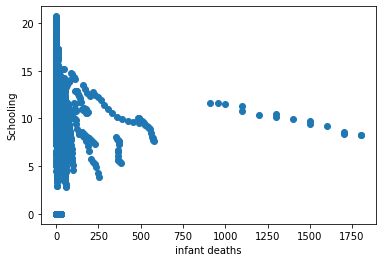

In [12]:
plt.scatter(data_raw['infant deaths'], data_raw['Schooling'], alpha=1)
plt.xlabel('infant deaths')
plt.ylabel('Schooling')
pass

Основная масса точек расположена в левой части графика, но некоторые точки сильно выбиваются из общей массы. Найдем квантили для этих признаков

In [13]:
data_raw['infant deaths'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100       0.00
0.500       3.00
0.700      14.00
0.900      58.00
0.950      94.15
0.999    1700.00
1.000    1800.00
Name: infant deaths, dtype: float64

In [14]:
data_raw['Schooling'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     7.7000
0.500    12.3000
0.700    13.8000
0.900    15.9000
0.950    16.8000
0.999    20.4226
1.000    20.7000
Name: Schooling, dtype: float64

Аналогично построим диаграмму рассеивания для признаков 'Life expectancy' и 'Population' и найдем квантили для них

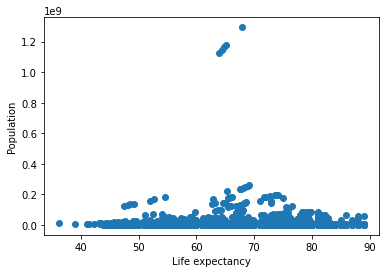

In [15]:
plt.scatter(data_raw['Life expectancy'], data_raw['Population'], alpha=1)
plt.xlabel('Life expectancy')
plt.ylabel('Population')
pass

In [16]:
data_raw['Population'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100    2.938250e+04
0.500    1.386542e+06
0.700    5.416702e+06
0.900    2.578714e+07
0.950    4.755442e+07
0.999    1.156888e+09
1.000    1.293859e+09
Name: Population, dtype: float64

In [17]:
data_raw['Life expectancy'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100    54.8
0.500    72.1
0.700    74.9
0.900    79.7
0.950    82.0
0.999    89.0
1.000    89.0
Name: Life expectancy, dtype: float64

Также посмотрим диаграмму рассеивания для признаков 'Measles' и 'Population'  и для 'infant deaths' и 'GDP'

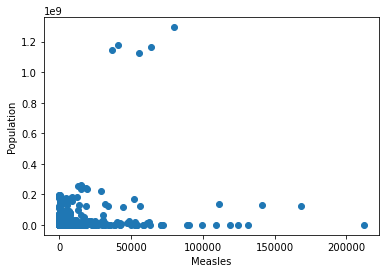

In [18]:
plt.scatter(data_raw['Measles'], data_raw['Population'], alpha=1)
plt.xlabel('Measles')
plt.ylabel('Population')
pass

In [19]:
data_raw['Measles'].quantile([.1,.5,.70, .90, .95, .9965, 1]) 

0.1000         0.0000
0.5000        17.0000
0.7000       192.9000
0.9000      3580.1000
0.9500      9985.5500
0.9965     97026.4075
1.0000    212183.0000
Name: Measles, dtype: float64

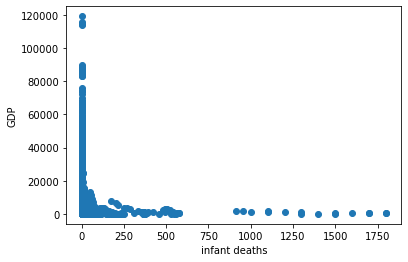

In [20]:
plt.scatter(data_raw['infant deaths'], data_raw['GDP'], alpha=1)
plt.xlabel('infant deaths')
plt.ylabel('GDP')
pass

In [21]:
data_raw['GDP'].quantile([.1,.5,.70, .90, .95, .998, 1]) 

0.100       161.462132
0.500      1766.947595
0.700      4691.110315
0.900     23726.139730
0.950     41606.848325
0.998     88590.670532
1.000    119172.741800
Name: GDP, dtype: float64

Для признака 'Population' и 'infant deaths' уберем значения, которые превышают значения квантиля равное 0.95, аналогично сделаем и для остальных 2 признаков ( для 'Measles' выше 0.9965, для 'GDP' выщк 0.998)

In [22]:
rows_to_drop = data_raw[
    (data_raw['Population'] > data_raw['Population'].quantile(0.95)) | (data_raw['Measles'] > data_raw['Measles'].quantile(0.9965))| (data_raw['infant deaths'] > data_raw['infant deaths'].quantile(0.95)) | (data_raw['GDP'] > data_raw['GDP'].quantile(0.998))].index
data_raw = data_raw.drop(rows_to_drop)
data_raw.shape

(2714, 22)

# Визуализация и получение основных характеристик

Выведем сводную информацию о признаках

In [23]:
data_raw.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2714.000000,2704.000000,2704.000000,2714.000000,2530.000000,2714.000000,2199.000000,2714.000000,2680.000000,2714.000000,2695.000000,2498.000000,2695.000000,2714.000000,2289.000000,2.085000e+03,2680.000000,2680.000000,2570.000000,2574.000000
mean,2007.553427,69.506435,163.197115,11.934046,4.636984,731.576031,81.985903,1002.412307,39.324291,17.072587,83.247866,6.057894,83.019295,1.736993,7529.425558,5.090313e+06,4.552873,4.569179,0.630200,12.082945
std,4.613908,9.446323,123.709788,19.265514,4.049584,1913.780444,24.308157,4205.772270,19.893542,28.930059,23.013459,2.490787,23.331899,5.179996,13785.900033,8.967422e+06,3.872855,3.931327,0.213153,3.363644
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.400000,73.000000,0.000000,0.912500,4.380458,79.000000,0.000000,21.300000,0.000000,79.000000,4.400000,81.000000,0.100000,473.844449,1.711610e+05,1.600000,1.500000,0.494000,10.300000
50%,2008.000000,72.400000,142.000000,2.000000,3.805000,70.143724,92.000000,10.000000,45.000000,3.000000,93.000000,5.870000,93.000000,0.100000,1886.433359,1.186873e+06,3.300000,3.300000,0.683000,12.400000
75%,2012.000000,75.900000,226.000000,15.000000,7.747500,462.192952,97.000000,211.750000,56.425000,20.000000,97.000000,7.595000,97.000000,0.700000,6387.785281,5.547683e+06,7.000000,6.900000,0.782750,14.300000
max,2015.000000,89.000000,723.000000,94.000000,17.870000,19479.911610,99.000000,63057.000000,87.300000,152.000000,99.000000,17.600000,99.000000,50.600000,88564.822980,4.734298e+07,19.900000,19.900000,0.948000,20.700000


В описании можно увидеть:

- count - количество значений для каждого признака. В нашем случае, в таблице все значения различны из-за пропущенных.
- mean - среднее значение
- std - стандартное отклонение
- min/max - минимальное / максимальное значение
- 25% - первый квартиль
- 50% - медиана
- 75% - третий квартиль

In [24]:
data_raw.describe(include=['category'])

,Country,Status
count,2714,2714
unique,186,2
top,Afghanistan,Developing
freq,16,2221


Для категориальных признаков мы получили:

- count - количество значений.
- unique - количество уникальных значений.
- top - наиболее встречающееся значение.
- freq - частота наиболее встречающегося значения.

## Вычислим матрицу корреляции

In [25]:
corr_matrix = data_raw.corr()
corr_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.157953,-0.078868,-0.035790,-0.053931,0.022834,0.087603,-0.137437,0.104106,-0.045939,0.085865,0.080434,0.123969,-0.138105,0.094773,0.057791,-0.040338,-0.032343,0.239366,0.204931
Life expectancy,0.157953,1.000000,-0.705250,-0.567194,0.421094,0.380257,0.236214,-0.175337,0.562136,-0.601500,0.444379,0.201465,0.449129,-0.559225,0.463977,-0.008967,-0.516859,-0.512764,0.717205,0.754119
Adult Mortality,-0.078868,-0.705250,1.000000,0.385208,-0.210282,-0.245226,-0.153775,0.100226,-0.395072,0.402869,-0.270321,-0.120452,-0.262118,0.523702,-0.303282,0.027695,0.360560,0.369653,-0.463920,-0.468045
infant deaths,-0.035790,-0.567194,0.385208,1.000000,-0.311331,-0.199356,-0.190520,0.285019,-0.400459,0.988739,-0.325247,-0.059154,-0.308875,0.215520,-0.256933,0.308747,0.395714,0.409311,-0.399641,-0.495304
Alcohol,-0.053931,0.421094,-0.210282,-0.311331,1.000000,0.328278,0.092313,-0.095142,0.316314,-0.304246,0.221067,0.283795,0.222196,-0.063403,0.342174,-0.024475,-0.457988,-0.444430,0.454354,0.543224
percentage expenditure,0.022834,0.380257,-0.245226,-0.199356,0.328278,1.000000,0.002544,-0.038841,0.225541,-0.193356,0.137936,0.173113,0.132499,-0.098448,0.885888,0.002141,-0.263311,-0.265919,0.380606,0.398152
Hepatitis B,0.087603,0.236214,-0.153775,-0.190520,0.092313,0.002544,1.000000,-0.086734,0.119908,-0.202107,0.494058,0.023982,0.613914,-0.115789,0.074370,-0.014527,-0.069764,-0.073287,0.190314,0.219036
Measles,-0.137437,-0.175337,0.100226,0.285019,-0.095142,-0.038841,-0.086734,1.000000,-0.156124,0.312182,-0.140433,-0.031450,-0.135217,0.050027,-0.062081,0.045153,0.163695,0.175374,-0.129043,-0.187972
BMI,0.104106,0.562136,-0.395072,-0.400459,0.316314,0.225541,0.119908,-0.156124,1.000000,-0.420711,0.260985,0.206488,0.259791,-0.253364,0.301958,-0.002789,-0.552536,-0.554528,0.499346,0.527662
Under-five deaths,-0.045939,-0.601500,0.402869,0.988739,-0.304246,-0.193356,-0.202107,0.312182,-0.420711,1.000000,-0.348351,-0.060889,-0.334739,0.233740,-0.251571,0.282781,0.397677,0.406178,-0.427161,-0.524643


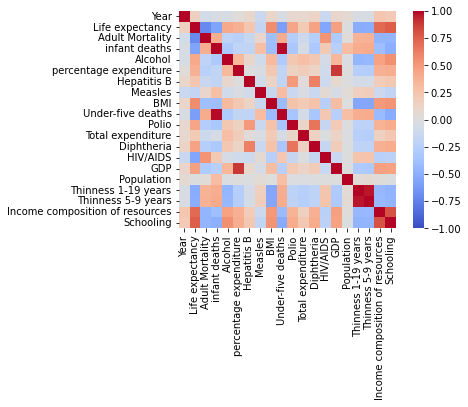

In [26]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

Признаки Thinness 1-19 years и Thinness 5-9 years имеют коэффициент корреляции близкий к 1, что логично, так как это аналогичные признаки, кроме того, коэффициенты корреляции близкие к 1 имеют признаки Schooling и Income composition of resources

In [27]:
data_raw['Status'].value_counts()

Developing    2221
Developed      493
Name: Status, dtype: int64

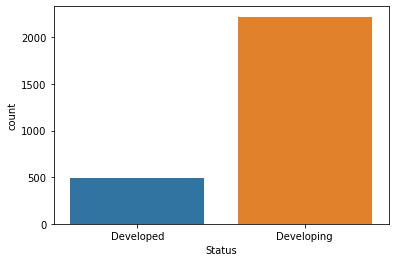

In [28]:
sns.countplot(x='Status', data=data_raw)
pass

Рассмотрев страны по статусу, можно увидеть, что количество развивающихся стран значительно выше

# Обработка пропущенных значений

Посмотрим, в каких строках у нас пропущены значения

In [29]:
data_raw.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            184
percentage expenditure               0
Hepatitis B                        515
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  216
Diphtheria                          19
HIV/AIDS                             0
GDP                                425
Population                         629
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    144
Schooling                          140
dtype: int64

Пропущенные значения варьируются от 10 до 629. Заполним пропущенные значения, которые больше 34, медианой

In [30]:
data_raw["Population"].fillna(data_raw["Population"].median(axis = 0), axis=0 , inplace=True)
data_raw["Hepatitis B"].fillna(data_raw["Hepatitis B"].median(axis = 0), axis=0 , inplace=True)
data_raw["GDP"].fillna(data_raw["GDP"].median(axis = 0), axis=0 , inplace=True)
data_raw["Total expenditure"].fillna(data_raw["Total expenditure"].median(axis = 0), axis=0 , inplace=True)
data_raw["Alcohol"].fillna(data_raw["Alcohol"].median(axis = 0), axis=0 , inplace=True)
data_raw["Income composition of resources"].fillna(data_raw["Income composition of resources"].median(axis = 0), axis=0 , inplace=True)
data_raw["Schooling"].fillna(data_raw["Schooling"].median(axis = 0), axis=0 , inplace=True)

In [31]:
data_raw.isna().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
BMI                                34
Under-five deaths                   0
Polio                              19
Total expenditure                   0
Diphtheria                         19
HIV/AIDS                            0
GDP                                 0
Population                          0
Thinness 1-19 years                34
Thinness 5-9 years                 34
Income composition of resources     0
Schooling                           0
dtype: int64

Остальные признаки имеют слишком малое кол-во пропущенных значений, поэтому можем просто удалить строчки с недостающими значениями

In [32]:
data_raw.dropna(axis=0, how='all', subset=['Life expectancy'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Adult Mortality'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['BMI'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Polio'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Diphtheria'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Thinness 1-19 years'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Thinness 5-9 years'], inplace=True)
print(data_raw.shape)
data_raw.isna().sum()

(2664, 22)


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# Обработка категориальных значений

Так как категориальный признак 'Status' выражен в буквенной форме, закодируем его с помощью числового признака

In [33]:
data_raw['Status'] = pd.factorize(data_raw['Status'])[0]
data_raw.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [34]:
del data_raw['Country']

# Нормализация

Проведем нормализацию с помощью линейного преобразования к отрезку [0,1]

In [35]:
data_norm = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_norm.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,...,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000
mean,0.503353,0.185060,0.632743,0.222456,0.123415,0.258543,0.038174,0.845893,0.015869,0.498978,...,0.837376,0.329000,0.836603,0.032579,0.076126,0.087206,0.225402,0.226228,0.673069,0.590692
std,0.307097,0.388419,0.178555,0.170889,0.201511,0.219965,0.099050,0.226542,0.067157,0.258604,...,0.238543,0.138058,0.239676,0.103427,0.145934,0.167526,0.195538,0.198503,0.214078,0.149866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.000000,0.521822,0.099723,0.000000,0.064250,0.000249,0.846939,0.000000,0.265013,...,0.812500,0.242600,0.814433,0.000000,0.006920,0.007272,0.075758,0.070707,0.543249,0.507246
50%,0.533333,0.000000,0.686907,0.191136,0.021277,0.212486,0.003675,0.928571,0.000174,0.573107,...,0.937500,0.319211,0.938144,0.000000,0.021281,0.025069,0.161616,0.161616,0.720464,0.599034
75%,0.800000,0.000000,0.753321,0.308864,0.148936,0.421053,0.024155,0.969388,0.003267,0.723238,...,0.979167,0.409315,0.979381,0.011881,0.058608,0.073702,0.348485,0.348485,0.821994,0.690821
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
data_norm.isna().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [37]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data_norm.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000
mean,0.503353,0.185060,0.632743,0.222456,0.123415,0.258543,0.038174,0.845893,0.015869,0.498978,0.108881,0.837376,0.329000,0.836603,0.032579,0.076126,0.087206,0.225402,0.226228,0.673069,0.590692
std,0.307097,0.388419,0.178555,0.170889,0.201511,0.219965,0.099050,0.226542,0.067157,0.258604,0.187003,0.238543,0.138058,0.239676,0.103427,0.145934,0.167526,0.195538,0.198503,0.214078,0.149866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.000000,0.521822,0.099723,0.000000,0.064250,0.000249,0.846939,0.000000,0.265013,0.000000,0.812500,0.242600,0.814433,0.000000,0.006920,0.007272,0.075758,0.070707,0.543249,0.507246
50%,0.533333,0.000000,0.686907,0.191136,0.021277,0.212486,0.003675,0.928571,0.000174,0.573107,0.019737,0.937500,0.319211,0.938144,0.000000,0.021281,0.025069,0.161616,0.161616,0.720464,0.599034
75%,0.800000,0.000000,0.753321,0.308864,0.148936,0.421053,0.024155,0.969388,0.003267,0.723238,0.118421,0.979167,0.409315,0.979381,0.011881,0.058608,0.073702,0.348485,0.348485,0.821994,0.690821
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Классификация

Для классификации разобьем данные на обучающую и тестовую выборки. За обучающую примем 75% данных, 25% - за тестовую



In [38]:
X = data_norm.drop(['Status'], axis=1)
y = data_raw['Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(1998, 666)

## K ближайших соседей

5 соседей (по умолчанию)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train.values, y_train.values)
y_train_predict = knn.predict(X_train.values)
y_test_predict = knn.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 96.30%, Test: 93.09%
MSE: Train 0.04, Test 0.07


Возьмем 7 соседей

In [41]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train.values, y_train.values)
y_train_predict = knn_7.predict(X_train.values)
y_test_predict = knn_7.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 95.45%, Test: 92.19%
MSE: Train 0.05, Test 0.08


Точность снизилась, поэтому возьмем 3 соседа

In [42]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train.values, y_train.values)
y_train_predict = knn_3.predict(X_train.values)
y_test_predict = knn_3.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))


Train: 97.70%, Test: 94.14%
MSE: Train 0.02, Test 0.06


Точность возросла

# Random Forest

Рассмотрим алгоритм - дерево решений

In [43]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
dct_train_score = 100 * dct.score(X_train, y_train)
print ('Tree Depth:', dct.get_depth())
print ('Tree Leaves:', dct.get_n_leaves())
dct_test_score = 100 * dct.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 14
Tree Leaves: 64
Accuracy. Train : 100.00%, Test: 96.25%. 


Максимальная глубина равна 14, уменьшим ее до 10

In [44]:
dct_10 = DecisionTreeClassifier(max_depth=10)
dct_10.fit(X_train,y_train)
dct_train_score = 100 * dct_10.score(X_train, y_train)
print ('Tree Depth:', dct_10.get_depth())
print ('Tree Leaves:', dct_10.get_n_leaves())
dct_test_score = 100 * dct_10.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 10
Tree Leaves: 59
Accuracy. Train : 99.70%, Test: 96.40%. 


Точность на тренировочной выборке снизилась, на тестовой не изменилась. Возьмем глубину равную 5

In [45]:
dct_5 = DecisionTreeClassifier(max_depth=5)
dct_5.fit(X_train,y_train.astype('int64'))
dct_train_score = 100 * dct_5.score(X_train, y_train)
print ('Tree Depth:', dct_5.get_depth())
print ('Tree Leaves:', dct_5.get_n_leaves())
dct_test_score = 100 * dct_5.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 5
Tree Leaves: 22
Accuracy. Train : 97.05%, Test: 95.65%. 


# Вывод

В данной работе был произведен анализ ожидаемой продолжительности жизни по данным ВОЗ и решение задачи классификации с помощью моделей, натренированых методами К-ближайших соседей и дерева решений.

Алгоритм Дерева Решений оказался точнее алгоритма к-ближайших соседей при оптимальных параметрах каждого из методов, как на обучающей выборке, так и на тестовой.

В результате решения задачи классификации мы получили:

- Алгоритм дерева решений сильно выигрывает по точности на тренировочной выборке у метода KNN
- При понижении числа соседей, точность KNN возрастает
- При уменьшении глубины в методе дерева решений, точность уменьшается
